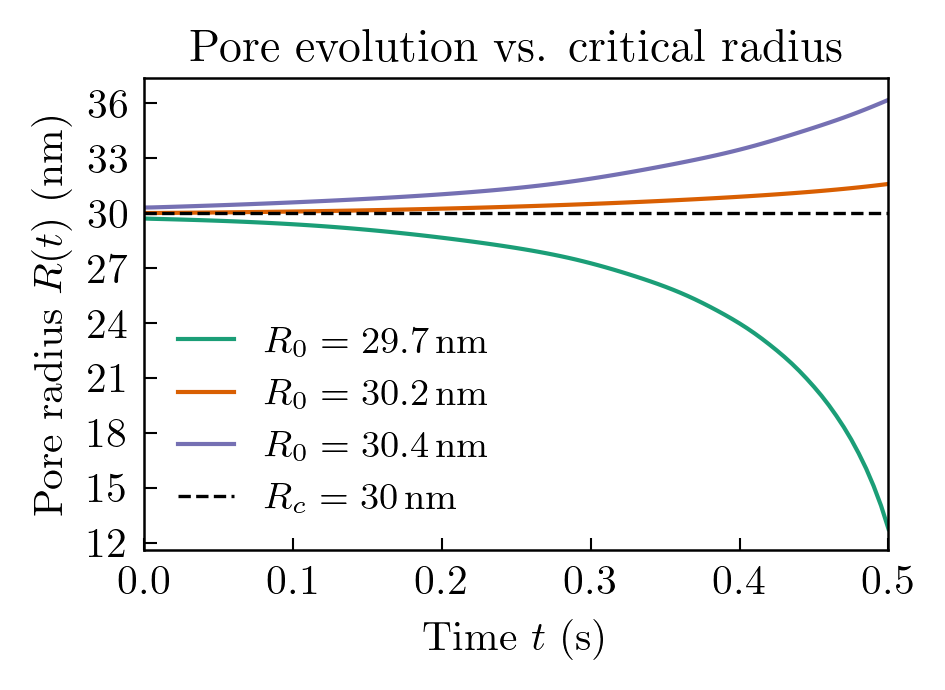

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter

# Set LaTeX and font styling
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "legend.fontsize": 9,
    "lines.linewidth": 1.0,
    "lines.markersize": 4,
    "figure.dpi": 300,
    "axes.linewidth": 0.6,
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5,
})

# Custom subtle color palette
color_list = ["#1b9e77", "#d95f02", "#7570b3"]

# Load CSV files
csv_files = sorted(glob.glob("radius_*.csv"))
if not csv_files:
    raise FileNotFoundError("No files matching radius_*.csv found.")

labels = [
    r"$R_0 = 29.7\,\mathrm{nm}$",
    r"$R_0 = 30.2\,\mathrm{nm}$",
    r"$R_0 = 30.4\,\mathrm{nm}$"
]

# Set up figure
fig, ax = plt.subplots(figsize=(3.25, 2.4))  # One-column figure size

# Plot each curve
for f, label, color in zip(csv_files, labels, color_list):
    df = pd.read_csv(f, usecols=["time_ns", "radius_nm"], dtype={"time_ns": float, "radius_nm": float})
    time_s = df["time_ns"].values * 1e-9
    radius_nm = df["radius_nm"].values
    ax.plot(time_s, radius_nm, label=label, color=color)

# Add critical radius line
ax.axhline(y=30, color="black", linestyle="--", linewidth=0.8, label=r"$R_c = 30\,\mathrm{nm}$")

# Label and style
ax.set_xlabel(r"Time $t$ (s)")
ax.set_ylabel(r"Pore radius $R(t)$ (nm)")
ax.set_title("Pore evolution vs. critical radius", pad=4)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(direction='in', length=3, width=0.5)
ax.legend(frameon=False, handlelength=1.5, loc='best')

# Start x-axis at zero
ax.set_xlim(left=0, right=0.5)

# Remove grid, tighten layout
ax.grid(False)
fig.tight_layout()
fig.savefig("pore_radius_vs_time.pdf", bbox_inches="tight")
plt.show()